Dataset loaded successfully!
Shape: (9515, 11)

First few rows:

DATA EXPLORATION

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       9515 non-null   int64 
 1   ID               9515 non-null   int64 
 2   Title            9515 non-null   object
 3   Year             9515 non-null   int64 
 4   Age              5338 non-null   object
 5   Rotten Tomatoes  9508 non-null   object
 6   Netflix          9515 non-null   int64 
 7   Hulu             9515 non-null   int64 
 8   Prime Video      9515 non-null   int64 
 9   Disney+          9515 non-null   int64 
 10  Type             9515 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 817.8+ KB
None

Column Names:
['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'Rotten Tomatoes', 'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type']

Missing Values

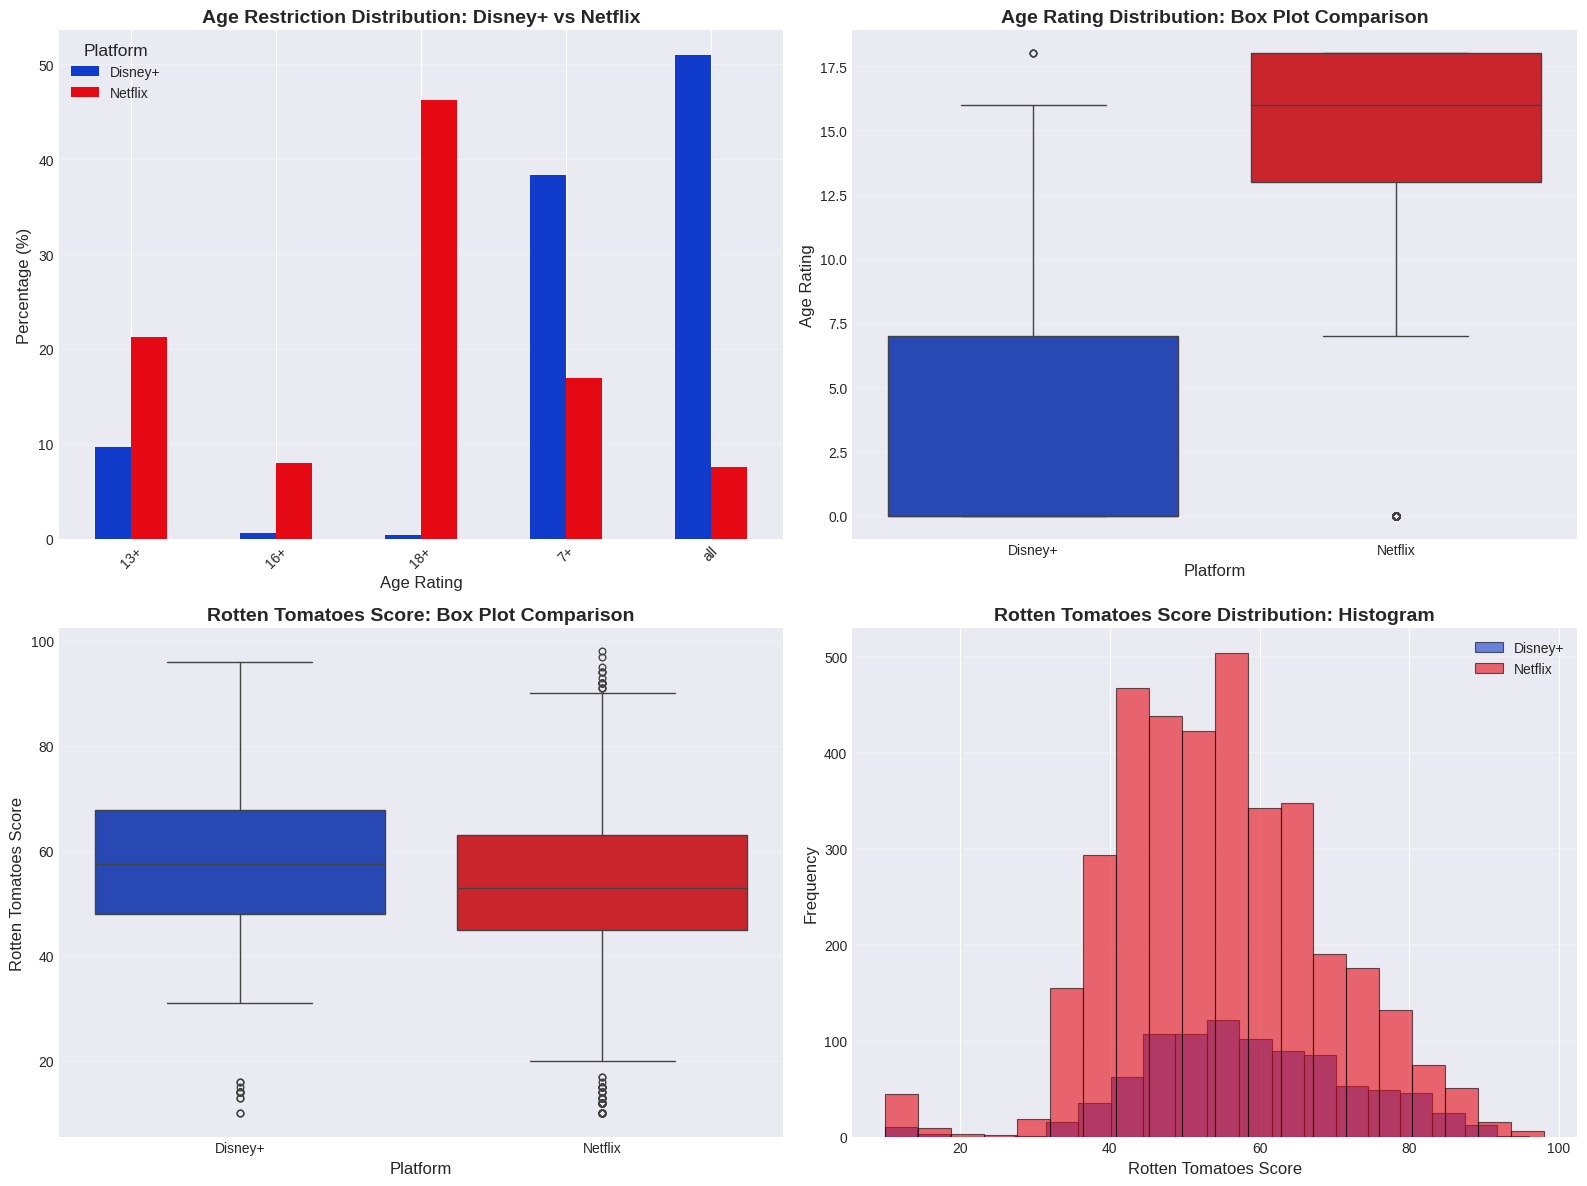

Figure 1: Main comparison visualizations created successfully!


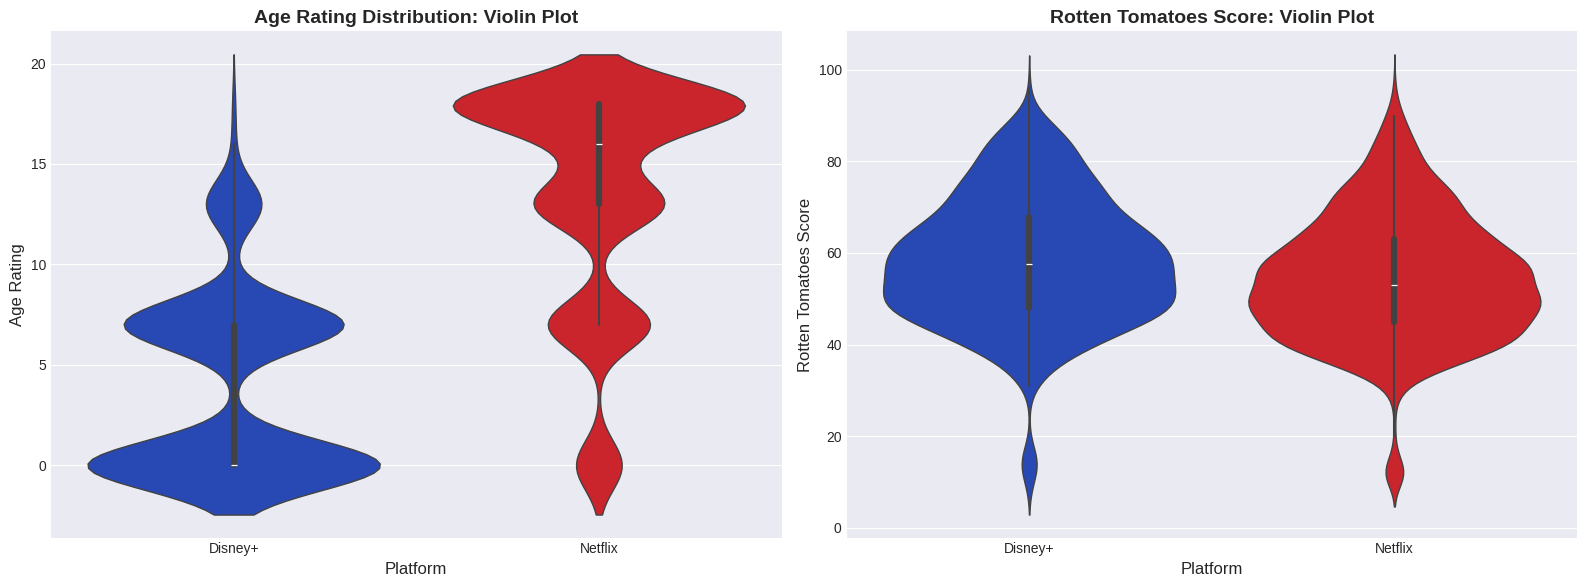

Figure 2: Violin plots created successfully!

HYPOTHESIS TESTING

--- TEST 1: AGE RESTRICTION (Disney+ vs Netflix) ---

Research Question: Is the age restriction for movies on Disney+ lower than for movies on Netflix?

Disney+ movies with age data: 725
Netflix movies with age data: 1898

Hypotheses:
H0: The median age restriction on Disney+ is equal to or greater than Netflix
H1: The median age restriction on Disney+ is lower than Netflix
Significance level: α = 0.05

--- Normality Tests (Shapiro-Wilk) ---
Disney+ - Shapiro-Wilk p-value: 0.000000
Netflix - Shapiro-Wilk p-value: 0.000000
→ At least one distribution is not normal. Using Mann-Whitney U test (non-parametric).

--- Mann-Whitney U Test (One-tailed) ---
Test Statistic (U): 166350.50
p-value (one-tailed): 0.000000
p-value (two-tailed): 0.000000
Effect Size (rank-biserial correlation): 0.7582

--- Interpretation ---
✓ Reject H0 (p = 0.000000 < 0.05)
→ There is statistically significant evidence that Disney+ has lower age restri

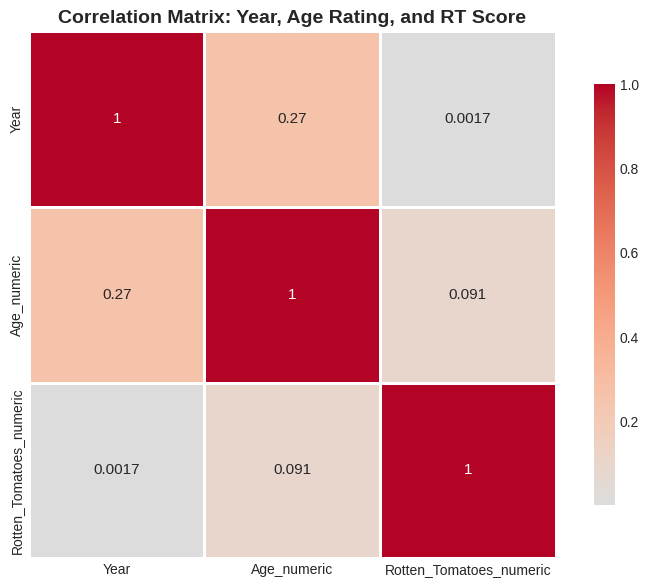


--- Platform Overlap Analysis ---

Number of platforms per movie:
Platform_Count
1    9262
2     245
3       7
4       1
Name: count, dtype: int64

Exclusive to Disney+: 900
Exclusive to Netflix: 3550

SUMMARY TABLE FOR REPORT

               Metric Disney+ Netflix
        Total Movies     922    3695
     Mean Age Rating    4.10   13.54
   Median Age Rating    0.00   16.00
  Std Dev Age Rating    4.59    5.56
       Mean RT Score   58.31   54.45
     Median RT Score   57.50   53.00
    Std Dev RT Score   13.95   13.85
Movies with Age Data     725    1898
 Movies with RT Data     922    3688

                             Test        Hypothesis Test Statistic  p-value Significance Effect Size
Age Restriction (Mann-Whitney U) Disney+ < Netflix      166350.50 0.000000          Yes      0.7582
       RT Score (Mann-Whitney U) Disney+ ≠ Netflix     1984865.00 0.000000          Yes     -0.1675

EXPORTING RESULTS

All results have been exported successfully!
Files created:
  - streaming_plat

In [4]:
"""
===================================================================================
TU Dortmund University - Master Data Science Application Report
Analysis of Movies on Streaming Platforms (Netflix, Hulu, Prime Video, Disney+)
===================================================================================

Research Questions:
1. Is the age restriction for movies on Disney+ lower than for movies on Netflix?
2. Is there a difference in Rotten Tomatoes Score between Disney+ and Netflix?

Author: [Your Name]
Date: December 2024
===================================================================================
"""

# ===================================================================================
# SECTION 1: SETUP AND DATA LOADING
# ===================================================================================

# Install required packages (uncomment if needed)
# !pip install scipy scikit-learn seaborn matplotlib pandas numpy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import mannwhitneyu, ttest_ind, chi2_contingency
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

# Download dataset from Kaggle (you'll need Kaggle API credentials)
# Option 1: Using Kaggle API
# !kaggle datasets download -d ruchi798/movies-on-netflix-prime-video-hulu-and-disney
# !unzip movies-on-netflix-prime-video-hulu-and-disney.zip

# Option 2: Manual upload to Colab
# from google.colab import files
# uploaded = files.upload()

# Load the data
df = pd.read_csv('MoviesOnStreamingPlatforms.csv')

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print("\nFirst few rows:")
df.head()

# ===================================================================================
# SECTION 2: DATA EXPLORATION AND PREPROCESSING
# ===================================================================================

print("\n" + "="*80)
print("DATA EXPLORATION")
print("="*80)

# Basic information
print("\nDataset Information:")
print(df.info())

print("\nColumn Names:")
print(df.columns.tolist())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nMissing Values Percentage:")
print((df.isnull().sum() / len(df) * 100).round(2))

# Check data types and unique values
print("\nData Types and Unique Values:")
for col in df.columns:
    print(f"{col}: {df[col].dtype}, Unique: {df[col].nunique()}")

# ===================================================================================
# SECTION 3: DATA CLEANING AND PREPARATION
# ===================================================================================

print("\n" + "="*80)
print("DATA CLEANING")
print("="*80)

# Create a working copy
df_clean = df.copy()

# Drop unnecessary columns
columns_to_drop = ['Unnamed: 0', 'ID', 'Type'] if 'Unnamed: 0' in df.columns else []
if columns_to_drop:
    df_clean = df_clean.drop(columns_to_drop, axis=1, errors='ignore')

# Check streaming platform columns
streaming_platforms = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
print(f"\nStreaming Platform Columns: {streaming_platforms}")

# Convert platform columns to binary (1/0)
for platform in streaming_platforms:
    if platform in df_clean.columns:
        df_clean[platform] = df_clean[platform].astype(int)

# Clean Age column (remove '+' and convert to numeric)
if 'Age' in df_clean.columns:
    df_clean['Age_clean'] = df_clean['Age'].astype(str).str.replace('+', '').str.strip()
    # Map age ratings to numeric values for comparison
    age_mapping = {
        'all': 0,
        '7': 7,
        '13': 13,
        '16': 16,
        '18': 18,
        'nan': np.nan
    }
    df_clean['Age_numeric'] = df_clean['Age_clean'].str.lower().map(age_mapping)

# Clean Rotten Tomatoes score (remove '/100' and convert to numeric)
if 'Rotten Tomatoes' in df_clean.columns:
    df_clean['Rotten_Tomatoes_clean'] = df_clean['Rotten Tomatoes'].astype(str).str.replace('/100', '').str.strip()
    df_clean['Rotten_Tomatoes_numeric'] = pd.to_numeric(df_clean['Rotten_Tomatoes_clean'], errors='coerce')

# Create subsets for Disney+ and Netflix
df_disney = df_clean[df_clean['Disney+'] == 1].copy()
df_netflix = df_clean[df_clean['Netflix'] == 1].copy()

print(f"\nTotal movies in dataset: {len(df_clean)}")
print(f"Movies on Disney+: {len(df_disney)}")
print(f"Movies on Netflix: {len(df_netflix)}")
print(f"Movies on both platforms: {len(df_clean[(df_clean['Disney+'] == 1) & (df_clean['Netflix'] == 1)])}")

# ===================================================================================
# SECTION 4: DESCRIPTIVE STATISTICS
# ===================================================================================

print("\n" + "="*80)
print("DESCRIPTIVE STATISTICS")
print("="*80)

# 4.1 Age Restriction Analysis
print("\n--- AGE RESTRICTION ANALYSIS ---")

# Disney+ Age Distribution
print("\nDisney+ Age Restriction Distribution:")
disney_age_dist = df_disney['Age'].value_counts().sort_index()
print(disney_age_dist)
print(f"\nDisney+ - Mean Age Restriction: {df_disney['Age_numeric'].mean():.2f}")
print(f"Disney+ - Median Age Restriction: {df_disney['Age_numeric'].median():.2f}")
print(f"Disney+ - Std Dev: {df_disney['Age_numeric'].std():.2f}")

# Netflix Age Distribution
print("\nNetflix Age Restriction Distribution:")
netflix_age_dist = df_netflix['Age'].value_counts().sort_index()
print(netflix_age_dist)
print(f"\nNetflix - Mean Age Restriction: {df_netflix['Age_numeric'].mean():.2f}")
print(f"Netflix - Median Age Restriction: {df_netflix['Age_numeric'].median():.2f}")
print(f"Netflix - Std Dev: {df_netflix['Age_numeric'].std():.2f}")

# 4.2 Rotten Tomatoes Score Analysis
print("\n--- ROTTEN TOMATOES SCORE ANALYSIS ---")

# Disney+ RT Scores
print("\nDisney+ Rotten Tomatoes Scores:")
print(df_disney['Rotten_Tomatoes_numeric'].describe())

# Netflix RT Scores
print("\nNetflix Rotten Tomatoes Scores:")
print(df_netflix['Rotten_Tomatoes_numeric'].describe())

# 4.3 Overall Platform Statistics
print("\n--- PLATFORM STATISTICS ---")
platform_stats = pd.DataFrame({
    'Total Movies': [len(df_disney), len(df_netflix)],
    'Avg Age Rating': [df_disney['Age_numeric'].mean(), df_netflix['Age_numeric'].mean()],
    'Avg RT Score': [df_disney['Rotten_Tomatoes_numeric'].mean(),
                      df_netflix['Rotten_Tomatoes_numeric'].mean()],
    'Movies with Age Data': [df_disney['Age_numeric'].notna().sum(),
                              df_netflix['Age_numeric'].notna().sum()],
    'Movies with RT Score': [df_disney['Rotten_Tomatoes_numeric'].notna().sum(),
                              df_netflix['Rotten_Tomatoes_numeric'].notna().sum()]
}, index=['Disney+', 'Netflix'])

print("\n", platform_stats)

# ===================================================================================
# SECTION 5: VISUALIZATIONS
# ===================================================================================

print("\n" + "="*80)
print("CREATING VISUALIZATIONS")
print("="*80)

# 5.1 Age Restriction Comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Subplot 1: Age Distribution - Side by Side Bar Chart
age_comparison = pd.DataFrame({
    'Disney+': df_disney['Age'].value_counts(normalize=True).sort_index() * 100,
    'Netflix': df_netflix['Age'].value_counts(normalize=True).sort_index() * 100
}).fillna(0)

age_comparison.plot(kind='bar', ax=axes[0, 0], color=['#113CCB', '#E50914'])
axes[0, 0].set_title('Age Restriction Distribution: Disney+ vs Netflix', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Age Rating', fontsize=12)
axes[0, 0].set_ylabel('Percentage (%)', fontsize=12)
axes[0, 0].legend(title='Platform', fontsize=10)
axes[0, 0].grid(axis='y', alpha=0.3)
plt.setp(axes[0, 0].xaxis.get_majorticklabels(), rotation=45)

# Subplot 2: Box Plot for Age Ratings
age_data = pd.DataFrame({
    'Age Rating': list(df_disney['Age_numeric'].dropna()) + list(df_netflix['Age_numeric'].dropna()),
    'Platform': ['Disney+'] * len(df_disney['Age_numeric'].dropna()) + ['Netflix'] * len(df_netflix['Age_numeric'].dropna())
})

sns.boxplot(data=age_data, x='Platform', y='Age Rating', ax=axes[0, 1], palette=['#113CCB', '#E50914'])
axes[0, 1].set_title('Age Rating Distribution: Box Plot Comparison', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Age Rating', fontsize=12)
axes[0, 1].grid(axis='y', alpha=0.3)

# Subplot 3: Rotten Tomatoes Score Distribution
rt_data = pd.DataFrame({
    'RT Score': list(df_disney['Rotten_Tomatoes_numeric'].dropna()) + list(df_netflix['Rotten_Tomatoes_numeric'].dropna()),
    'Platform': ['Disney+'] * len(df_disney['Rotten_Tomatoes_numeric'].dropna()) + ['Netflix'] * len(df_netflix['Rotten_Tomatoes_numeric'].dropna())
})

sns.boxplot(data=rt_data, x='Platform', y='RT Score', ax=axes[1, 0], palette=['#113CCB', '#E50914'])
axes[1, 0].set_title('Rotten Tomatoes Score: Box Plot Comparison', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Rotten Tomatoes Score', fontsize=12)
axes[1, 0].grid(axis='y', alpha=0.3)

# Subplot 4: Histogram Overlay for RT Scores
axes[1, 1].hist(df_disney['Rotten_Tomatoes_numeric'].dropna(), bins=20, alpha=0.6,
                label='Disney+', color='#113CCB', edgecolor='black')
axes[1, 1].hist(df_netflix['Rotten_Tomatoes_numeric'].dropna(), bins=20, alpha=0.6,
                label='Netflix', color='#E50914', edgecolor='black')
axes[1, 1].set_title('Rotten Tomatoes Score Distribution: Histogram', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Rotten Tomatoes Score', fontsize=12)
axes[1, 1].set_ylabel('Frequency', fontsize=12)
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('streaming_platforms_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure 1: Main comparison visualizations created successfully!")

# Additional visualization: Violin plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Violin plot for Age Ratings
sns.violinplot(data=age_data, x='Platform', y='Age Rating', ax=axes[0], palette=['#113CCB', '#E50914'])
axes[0].set_title('Age Rating Distribution: Violin Plot', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Age Rating', fontsize=12)

# Violin plot for RT Scores
sns.violinplot(data=rt_data, x='Platform', y='RT Score', ax=axes[1], palette=['#113CCB', '#E50914'])
axes[1].set_title('Rotten Tomatoes Score: Violin Plot', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Rotten Tomatoes Score', fontsize=12)

plt.tight_layout()
plt.savefig('violin_plots_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure 2: Violin plots created successfully!")

# ===================================================================================
# SECTION 6: HYPOTHESIS TESTING
# ===================================================================================

print("\n" + "="*80)
print("HYPOTHESIS TESTING")
print("="*80)

# 6.1 TEST 1: Age Restriction Comparison
print("\n--- TEST 1: AGE RESTRICTION (Disney+ vs Netflix) ---")
print("\nResearch Question: Is the age restriction for movies on Disney+ lower than for movies on Netflix?")

# Get clean data (remove NaN values)
disney_age = df_disney['Age_numeric'].dropna()
netflix_age = df_netflix['Age_numeric'].dropna()

print(f"\nDisney+ movies with age data: {len(disney_age)}")
print(f"Netflix movies with age data: {len(netflix_age)}")

# Hypotheses
print("\nHypotheses:")
print("H0: The median age restriction on Disney+ is equal to or greater than Netflix")
print("H1: The median age restriction on Disney+ is lower than Netflix")
print("Significance level: α = 0.05")

# Check normality
print("\n--- Normality Tests (Shapiro-Wilk) ---")
shapiro_disney_age = stats.shapiro(disney_age.sample(min(5000, len(disney_age))))
shapiro_netflix_age = stats.shapiro(netflix_age.sample(min(5000, len(netflix_age))))

print(f"Disney+ - Shapiro-Wilk p-value: {shapiro_disney_age.pvalue:.6f}")
print(f"Netflix - Shapiro-Wilk p-value: {shapiro_netflix_age.pvalue:.6f}")

if shapiro_disney_age.pvalue < 0.05 or shapiro_netflix_age.pvalue < 0.05:
    print("→ At least one distribution is not normal. Using Mann-Whitney U test (non-parametric).")
    test_choice = "mann_whitney"
else:
    print("→ Both distributions appear normal. Could use t-test, but Mann-Whitney is more robust.")
    test_choice = "mann_whitney"

# Perform Mann-Whitney U test (one-tailed)
print("\n--- Mann-Whitney U Test (One-tailed) ---")
stat_age, pvalue_age_twotailed = mannwhitneyu(disney_age, netflix_age, alternative='two-sided')
stat_age, pvalue_age = mannwhitneyu(disney_age, netflix_age, alternative='less')

print(f"Test Statistic (U): {stat_age:.2f}")
print(f"p-value (one-tailed): {pvalue_age:.6f}")
print(f"p-value (two-tailed): {pvalue_age_twotailed:.6f}")

# Effect size (rank-biserial correlation)
n1, n2 = len(disney_age), len(netflix_age)
rank_biserial = 1 - (2*stat_age) / (n1 * n2)
print(f"Effect Size (rank-biserial correlation): {rank_biserial:.4f}")

# Interpretation
print("\n--- Interpretation ---")
if pvalue_age < 0.05:
    print(f"✓ Reject H0 (p = {pvalue_age:.6f} < 0.05)")
    print("→ There is statistically significant evidence that Disney+ has lower age restrictions than Netflix.")
else:
    print(f"✗ Fail to reject H0 (p = {pvalue_age:.6f} ≥ 0.05)")
    print("→ There is insufficient evidence to conclude that Disney+ has lower age restrictions than Netflix.")

print(f"\nMedian age rating - Disney+: {disney_age.median()}")
print(f"Median age rating - Netflix: {netflix_age.median()}")
print(f"Mean age rating - Disney+: {disney_age.mean():.2f}")
print(f"Mean age rating - Netflix: {netflix_age.mean():.2f}")

# 6.2 TEST 2: Rotten Tomatoes Score Comparison
print("\n" + "="*80)
print("--- TEST 2: ROTTEN TOMATOES SCORE (Disney+ vs Netflix) ---")
print("\nResearch Question: Is there a difference in Rotten Tomatoes Score between Disney+ and Netflix?")

# Get clean data
disney_rt = df_disney['Rotten_Tomatoes_numeric'].dropna()
netflix_rt = df_netflix['Rotten_Tomatoes_numeric'].dropna()

print(f"\nDisney+ movies with RT data: {len(disney_rt)}")
print(f"Netflix movies with RT data: {len(netflix_rt)}")

# Hypotheses
print("\nHypotheses:")
print("H0: There is no difference in median RT scores between Disney+ and Netflix")
print("H1: There is a difference in median RT scores between Disney+ and Netflix")
print("Significance level: α = 0.05")

# Check normality
print("\n--- Normality Tests (Shapiro-Wilk) ---")
shapiro_disney_rt = stats.shapiro(disney_rt.sample(min(5000, len(disney_rt))))
shapiro_netflix_rt = stats.shapiro(netflix_rt.sample(min(5000, len(netflix_rt))))

print(f"Disney+ - Shapiro-Wilk p-value: {shapiro_disney_rt.pvalue:.6f}")
print(f"Netflix - Shapiro-Wilk p-value: {shapiro_netflix_rt.pvalue:.6f}")

if shapiro_disney_rt.pvalue < 0.05 or shapiro_netflix_rt.pvalue < 0.05:
    print("→ At least one distribution is not normal. Using Mann-Whitney U test (non-parametric).")
else:
    print("→ Both distributions appear normal. Could use independent t-test.")

# Perform Mann-Whitney U test (two-tailed)
print("\n--- Mann-Whitney U Test (Two-tailed) ---")
stat_rt, pvalue_rt = mannwhitneyu(disney_rt, netflix_rt, alternative='two-sided')

print(f"Test Statistic (U): {stat_rt:.2f}")
print(f"p-value (two-tailed): {pvalue_rt:.6f}")

# Effect size
n1_rt, n2_rt = len(disney_rt), len(netflix_rt)
rank_biserial_rt = 1 - (2*stat_rt) / (n1_rt * n2_rt)
print(f"Effect Size (rank-biserial correlation): {rank_biserial_rt:.4f}")

# Also perform independent t-test for comparison
print("\n--- Independent t-test (for comparison) ---")
tstat_rt, pvalue_ttest_rt = ttest_ind(disney_rt, netflix_rt)
print(f"t-statistic: {tstat_rt:.4f}")
print(f"p-value: {pvalue_ttest_rt:.6f}")

# Cohen's d effect size for t-test
pooled_std = np.sqrt(((len(disney_rt)-1)*disney_rt.std()**2 + (len(netflix_rt)-1)*netflix_rt.std()**2) / (len(disney_rt) + len(netflix_rt) - 2))
cohens_d = (disney_rt.mean() - netflix_rt.mean()) / pooled_std
print(f"Cohen's d: {cohens_d:.4f}")

# Interpretation
print("\n--- Interpretation ---")
if pvalue_rt < 0.05:
    print(f"✓ Reject H0 (p = {pvalue_rt:.6f} < 0.05)")
    print("→ There is a statistically significant difference in RT scores between Disney+ and Netflix.")
else:
    print(f"✗ Fail to reject H0 (p = {pvalue_rt:.6f} ≥ 0.05)")
    print("→ There is no statistically significant difference in RT scores between Disney+ and Netflix.")

print(f"\nMedian RT score - Disney+: {disney_rt.median():.2f}")
print(f"Median RT score - Netflix: {netflix_rt.median():.2f}")
print(f"Mean RT score - Disney+: {disney_rt.mean():.2f}")
print(f"Mean RT score - Netflix: {netflix_rt.mean():.2f}")

# ===================================================================================
# SECTION 7: ADDITIONAL ANALYSIS (BONUS)
# ===================================================================================

print("\n" + "="*80)
print("ADDITIONAL ANALYSIS")
print("="*80)

# 7.1 Correlation Analysis
print("\n--- Correlation between Year, Age, and RT Score ---")
correlation_data = df_clean[['Year', 'Age_numeric', 'Rotten_Tomatoes_numeric']].dropna()
correlation_matrix = correlation_data.corr()
print(correlation_matrix)

# Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix: Year, Age Rating, and RT Score', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# 7.2 Platform Overlap Analysis
print("\n--- Platform Overlap Analysis ---")
df_clean['Platform_Count'] = df_clean[streaming_platforms].sum(axis=1)
print("\nNumber of platforms per movie:")
print(df_clean['Platform_Count'].value_counts().sort_index())

# Movies exclusive to one platform
exclusive_disney = df_clean[(df_clean['Disney+'] == 1) & (df_clean['Platform_Count'] == 1)]
exclusive_netflix = df_clean[(df_clean['Netflix'] == 1) & (df_clean['Platform_Count'] == 1)]

print(f"\nExclusive to Disney+: {len(exclusive_disney)}")
print(f"Exclusive to Netflix: {len(exclusive_netflix)}")

# 7.3 Genre Analysis (if available)
if 'Genres' in df_clean.columns:
    print("\n--- Top Genres on Each Platform ---")
    disney_genres = df_disney['Genres'].dropna().str.split(',').explode().str.strip()
    netflix_genres = df_netflix['Genres'].dropna().str.split(',').explode().str.strip()

    print("\nTop 10 Genres on Disney+:")
    print(disney_genres.value_counts().head(10))

    print("\nTop 10 Genres on Netflix:")
    print(netflix_genres.value_counts().head(10))

# ===================================================================================
# SECTION 8: SUMMARY TABLE FOR REPORT
# ===================================================================================

print("\n" + "="*80)
print("SUMMARY TABLE FOR REPORT")
print("="*80)

summary_table = pd.DataFrame({
    'Metric': [
        'Total Movies',
        'Mean Age Rating',
        'Median Age Rating',
        'Std Dev Age Rating',
        'Mean RT Score',
        'Median RT Score',
        'Std Dev RT Score',
        'Movies with Age Data',
        'Movies with RT Data'
    ],
    'Disney+': [
        len(df_disney),
        f"{disney_age.mean():.2f}",
        f"{disney_age.median():.2f}",
        f"{disney_age.std():.2f}",
        f"{disney_rt.mean():.2f}",
        f"{disney_rt.median():.2f}",
        f"{disney_rt.std():.2f}",
        len(disney_age),
        len(disney_rt)
    ],
    'Netflix': [
        len(df_netflix),
        f"{netflix_age.mean():.2f}",
        f"{netflix_age.median():.2f}",
        f"{netflix_age.std():.2f}",
        f"{netflix_rt.mean():.2f}",
        f"{netflix_rt.median():.2f}",
        f"{netflix_rt.std():.2f}",
        len(netflix_age),
        len(netflix_rt)
    ]
})

print("\n", summary_table.to_string(index=False))

# Statistical test results
test_results = pd.DataFrame({
    'Test': ['Age Restriction (Mann-Whitney U)', 'RT Score (Mann-Whitney U)'],
    'Hypothesis': ['Disney+ < Netflix', 'Disney+ ≠ Netflix'],
    'Test Statistic': [f"{stat_age:.2f}", f"{stat_rt:.2f}"],
    'p-value': [f"{pvalue_age:.6f}", f"{pvalue_rt:.6f}"],
    'Significance': ['Yes' if pvalue_age < 0.05 else 'No',
                     'Yes' if pvalue_rt < 0.05 else 'No'],
    'Effect Size': [f"{rank_biserial:.4f}", f"{rank_biserial_rt:.4f}"]
})

print("\n", test_results.to_string(index=False))

# ===================================================================================
# SECTION 9: EXPORT RESULTS
# ===================================================================================

print("\n" + "="*80)
print("EXPORTING RESULTS")
print("="*80)

# Save summary statistics to CSV
summary_table.to_csv('summary_statistics.csv', index=False)
test_results.to_csv('test_results.csv', index=False)

print("\nAll results have been exported successfully!")
print("Files created:")
print("  - streaming_platforms_comparison.png")
print("  - violin_plots_comparison.png")
print("  - correlation_matrix.png")
print("  - summary_statistics.csv")
print("  - test_results.csv")

print("\n" + "="*80)
print("ANALYSIS COMPLETE!")
print("="*80)